In [257]:
workspace()
using JuAFEM

### Geometry

In [258]:
Ex = [0 1 1 0;
      1 2 2 1;
      1 2 2 1;
      0 1 1 0]

Ey = [0 0 1 1;
      0 0 1 1;
      1 1 2 2;
      1 1 2 2;];

Coord = [0 0
         1 0
         1 1
         0 1
         2 0
         2 1
         2 2
         1 2
         0 2];

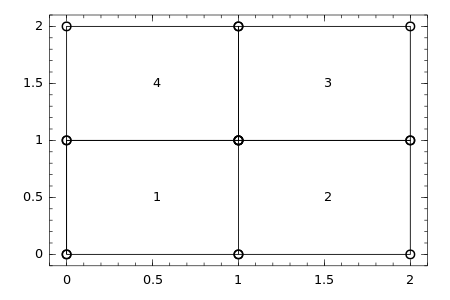

In [259]:
eldraw2(Ex, Ey, [1,1,0], 1:4)

### Dofs

In [260]:
Dof = [1 2
       3 4
       5 6
       7 8
       9 10
       11 12
       13 14
       15 16
       17 18]

Edof = [1 1 2 3 4 5 6 7 8;
        2 3 4 9 10 11 12 5 6;
        3 5 6 11 12 13 14 15 16;
        4 7 8 5 6 15 16 17 18];

### Boundary conditions

Imposed field: $u_x = u_y = 0.1x + 0.05y$

In [261]:
cx = 0.1
cy = 0.05
bc_dofs = [1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7, 8]
bc = zeros(length(bc_dofs), 2)
for i in 1:size(bc, 1)
      dof = bc_dofs[i]
      node = div(dof+1, 2)
      coord = Coord[node, :]
      bc[i, 1] = dof
      bc[i, 2] = cx * coord[1] + cy * coord[2]
end

### Solve

In [266]:
a = start_assemble()
D = hooke(2, 250e9, 0.3)
for e in 1:size(Edof, 1)
    ex = Ex[Edof[e,1], :]'
    ey = Ey[Edof[e,1], :]'
    Ke, _ = plani4e(ex, ey, [2, 1, 2], D)
    assemble(Edof[e, :], a, Ke)
end
K = end_assemble(a);
a, _ = solve_eq_sys(K, zeros(18), bc);

Displacment center node:

In [267]:
Ed = a[Edof[:,2:end]];

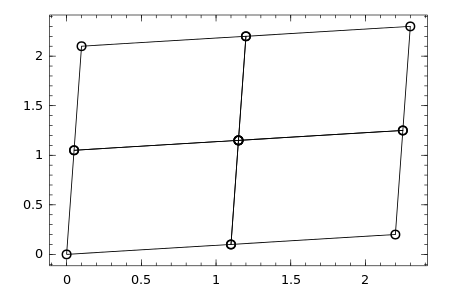

In [269]:
eldisp2(Ex, Ey, Ed)

In [270]:
display(cx + cy)
display(a[[5,6]])

0.15000000000000002

2-element Array{Float64,1}:
 0.15
 0.15